In [1]:
from understatapi import UnderstatClient
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
understat = UnderstatClient()

understat = UnderstatClient()
epl_2020 = understat.league("EPL").get_match_data(season="2020")
df_epl_2020 = pd.DataFrame.from_dict(epl_2020)
df_epl_2020.columns

Index(['id', 'isResult', 'h', 'a', 'goals', 'xG', 'datetime', 'forecast'], dtype='object')

In [3]:
def extract_data(df):
    df['homeTeam'] = df['h'].apply(lambda x: x['title'])
    df['awayTeam'] = df['a'].apply(lambda x: x['title'])
    df['homeGoals'] = df['goals'].apply(lambda x: int(x['h']))
    df['awayGoals'] = df['goals'].apply(lambda x: int(x['a']))
    df['homexG'] = df['xG'].apply(lambda x: x['h'])
    df['awayxG'] = df['xG'].apply(lambda x: x['a'])
    
    return df.sort_values('datetime')

df_epl_2020 = extract_data(df_epl_2020)
df_epl_2020

,id,isResult,h,a,goals,xG,datetime,forecast,homeTeam,awayTeam,homeGoals,awayGoals,homexG,awayxG
0,14086,True,"{'id': '228', 'title': 'Fulham', 'short_title'...","{'id': '83', 'title': 'Arsenal', 'short_title'...","{'h': '0', 'a': '3'}","{'h': '0.126327', 'a': '2.16287'}",2020-09-12 11:30:00,"{'w': '0.0037', 'd': '0.0476', 'l': '0.9487'}",Fulham,Arsenal,0,3,0.126327,2.16287
1,14087,True,"{'id': '78', 'title': 'Crystal Palace', 'short...","{'id': '74', 'title': 'Southampton', 'short_ti...","{'h': '1', 'a': '0'}","{'h': '1.39569', 'a': '1.26267'}",2020-09-12 14:00:00,"{'w': '0.3916', 'd': '0.3022', 'l': '0.3062'}",Crystal Palace,Southampton,1,0,1.39569,1.26267
2,14090,True,"{'id': '87', 'title': 'Liverpool', 'short_titl...","{'id': '245', 'title': 'Leeds', 'short_title':...","{'h': '4', 'a': '3'}","{'h': '3.15412', 'a': '0.269813'}",2020-09-12 16:30:00,"{'w': '0.9658', 'd': '0.0296', 'l': '0.0046'}",Liverpool,Leeds,4,3,3.15412,0.269813
3,14091,True,"{'id': '81', 'title': 'West Ham', 'short_title...","{'id': '86', 'title': 'Newcastle United', 'sho...","{'h': '0', 'a': '2'}","{'h': '0.861445', 'a': '1.65911'}",2020-09-12 19:00:00,"{'w': '0.1506', 'd': '0.248', 'l': '0.6014'}",West Ham,Newcastle United,0,2,0.861445,1.65911
4,14092,True,"{'id': '76', 'title': 'West Bromwich Albion', ...","{'id': '75', 'title': 'Leicester', 'short_titl...","{'h': '0', 'a': '3'}","{'h': '0.352997', 'a': '2.95581'}",2020-09-13 13:00:00,"{'w': '0.007', 'd': '0.0358', 'l': '0.9572'}",West Bromwich Albion,Leicester,0,3,0.352997,2.95581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,14810,True,"{'id': '87', 'title': 'Liverpool', 'short_titl...","{'id': '78', 'title': 'Crystal Palace', 'short...","{'h': '2', 'a': '0'}","{'h': '2.20348', 'a': '0.772317'}",2021-05-23 15:00:00,"{'w': '0.7516', 'd': '0.173', 'l': '0.0754'}",Liverpool,Crystal Palace,2,0,2.20348,0.772317
376,14811,True,"{'id': '88', 'title': 'Manchester City', 'shor...","{'id': '72', 'title': 'Everton', 'short_title'...","{'h': '5', 'a': '0'}","{'h': '2.88355', 'a': '1.07258'}",2021-05-23 15:00:00,"{'w': '0.7906', 'd': '0.1483', 'l': '0.0611'}",Manchester City,Everton,5,0,2.88355,1.07258
377,14812,True,"{'id': '238', 'title': 'Sheffield United', 'sh...","{'id': '92', 'title': 'Burnley', 'short_title'...","{'h': '1', 'a': '0'}","{'h': '0.420006', 'a': '0.558508'}",2021-05-23 15:00:00,"{'w': '0.2153', 'd': '0.467', 'l': '0.3177'}",Sheffield United,Burnley,1,0,0.420006,0.558508
378,14813,True,"{'id': '81', 'title': 'West Ham', 'short_title...","{'id': '74', 'title': 'Southampton', 'short_ti...","{'h': '3', 'a': '0'}","{'h': '1.98344', 'a': '1.35179'}",2021-05-23 15:00:00,"{'w': '0.5303', 'd': '0.2337', 'l': '0.236'}",West Ham,Southampton,3,0,1.98344,1.35179


In [4]:
home = df_epl_2020[['id', 'homeTeam', 'awayTeam', 'homeGoals', 'homexG']].assign(home=1).rename(
    columns={'homeTeam': 'team', 'awayTeam': 'opponent', 'homeGoals': 'goals', 'homexG': 'xG'})

home

,id,team,opponent,goals,xG,home
0,14086,Fulham,Arsenal,0,0.126327,1
1,14087,Crystal Palace,Southampton,1,1.39569,1
2,14090,Liverpool,Leeds,4,3.15412,1
3,14091,West Ham,Newcastle United,0,0.861445,1
4,14092,West Bromwich Albion,Leicester,0,0.352997,1
...,...,...,...,...,...,...
375,14810,Liverpool,Crystal Palace,2,2.20348,1
376,14811,Manchester City,Everton,5,2.88355,1
377,14812,Sheffield United,Burnley,1,0.420006,1
378,14813,West Ham,Southampton,3,1.98344,1


In [5]:
away = df_epl_2020[['id', 'awayTeam', 'homeTeam', 'awayGoals', 'awayxG']].assign(home=0).rename(
    columns={'awayTeam': 'team', 'homeTeam': 'opponent', 'awayGoals': 'goals', 'awayxG': 'xG'})
away

,id,team,opponent,goals,xG,home
0,14086,Arsenal,Fulham,3,2.16287,0
1,14087,Southampton,Crystal Palace,0,1.26267,0
2,14090,Leeds,Liverpool,3,0.269813,0
3,14091,Newcastle United,West Ham,2,1.65911,0
4,14092,Leicester,West Bromwich Albion,3,2.95581,0
...,...,...,...,...,...,...
375,14810,Crystal Palace,Liverpool,0,0.772317,0
376,14811,Everton,Manchester City,0,1.07258,0
377,14812,Burnley,Sheffield United,0,0.558508,0
378,14813,Southampton,West Ham,0,1.35179,0


In [6]:
goal_model_data = pd.concat([home, away]).sort_values(by=['id', 'home'], ascending=[True, False]).reset_index(drop=True)
goal_model_data

,id,team,opponent,goals,xG,home
0,14086,Fulham,Arsenal,0,0.126327,1
1,14086,Arsenal,Fulham,3,2.16287,0
2,14087,Crystal Palace,Southampton,1,1.39569,1
3,14087,Southampton,Crystal Palace,0,1.26267,0
4,14088,Burnley,Manchester United,0,0.648582,1
...,...,...,...,...,...,...
755,14812,Burnley,Sheffield United,0,0.558508,0
756,14813,West Ham,Southampton,3,1.98344,1
757,14813,Southampton,West Ham,0,1.35179,0
758,14814,Wolverhampton Wanderers,Manchester United,1,0.701256,1


In [7]:
# Calculate the rolling xG mean for each team
goal_model_data['rollingTeamxG'] = goal_model_data.groupby('team')['xG'].transform(lambda x: x.shift().rolling(window=10, min_periods=3).mean())
goal_model_data[goal_model_data['team'] == 'Chelsea'].head()

,id,team,opponent,goals,xG,home,rollingTeamxG
19,14095,Chelsea,Brighton,3,1.27062,0,NaN
32,14102,Chelsea,Liverpool,0,0.904183,1,NaN
45,14108,Chelsea,West Bromwich Albion,3,2.36046,0,NaN
64,14467,Chelsea,Crystal Palace,4,2.51433,1,1.511754
80,14475,Chelsea,Southampton,3,1.98708,1,1.762398


In [8]:
# goal_model_data['rollingOpponentxG'] = goal_model_data.groupby('opponent')['xG'].transform(lambda x: x.shift().rolling(window=10, min_periods=3).mean())
# goal_model_data[goal_model_data['opponent'] == 'Chelsea'].head()

In [9]:
# poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data,
#                         family=sm.families.Poisson()).fit()
# poisson_model.summary()

In [10]:
poisson_model = smf.glm(formula="goals ~ home + team + opponent + rollingTeamxG", data=goal_model_data,
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  700
Model:                            GLM   Df Residuals:                      659
Model Family:                 Poisson   Df Model:                           40
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -989.58
Date:                Sat, 28 Oct 2023   Deviance:                       784.44
Time:                        22:02:50   Pearson chi2:                     710.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1858
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.2731      0.287     -0.953      0.341      -0.835       0.289
team[T.Aston Villa]                     0.0188      0.202      0.093      0.926      -0.376       0.414
team[T.Brighton]                       -0.3848      0.224     -1.716      0.086      -0.824       0.055
team[T.Burnley]                        -0.3299      0.237     -1.394      0.163      -0.794       0.134
team[T.Chelsea]                        -0.0085      0.204     -0.041      0.967      -0.408       0.391
team[T.Crystal Palace]                 -0.1543      0.228     -0.675      0.500      -0.602       0.294
team[T.Everton]                        -0.1921      0.215     -0.893      0.372      -0.614       0.230
team[T.Fulham]                         -0.6388      0.252     -2.532      0.011      -1.133      -0.144
team[T.Leeds]                           0.0861      0.199      0.434      0.665      -0.303       0.476
team[T.Leicester]                       0.1195      0.197      0.605      0.545      -0.267       0.506
team[T.Liverpool]                       0.0771      0.204      0.379      0.705      -0.322       0.476
team[T.Manchester City]                 0.2943      0.202      1.459      0.144      -0.101       0.690
team[T.Manchester United]               0.2866      0.192      1.495      0.135      -0.089       0.662
team[T.Newcastle United]               -0.0312      0.214     -0.146      0.884      -0.450       0.387
team[T.Sheffield United]               -0.7553      0.273     -2.767      0.006      -1.290      -0.220
team[T.Southampton]                    -0.0055      0.210     -0.026      0.979      -0.418       0.407
team[T.Tottenham]                       0.2445      0.192      1.271      0.204      -0.133       0.622
team[T.West Bromwich Albion]           -0.3383      0.242     -1.397      0.162      -0.813       0.136
team[T.West Ham]                        0.1373      0.196      0.700      0.484      -0.247       0.522
team[T.Wolverhampton Wanderers]        -0.3060      0.230     -1.330      0.183      -0.757       0.145
opponent[T.Aston Villa]                 0.2127      0.227      0.937      0.349      -0.232       0.658
opponent[T.Brighton]                    0.1166      0.232      0.502      0.615      -0.338       0.572
opponent[T.Burnley]                     0.3283      0.222      1.480      0.139      -0.107       0.763
opponent[T.Chelsea]                    -0.1664      0.249     -0.668      0.504      -0.655       0.322
opponent[T.Crystal Palace]              0.5807      0.211      2.746      0.006       0.166       0.995
opponent[T.Everton]                     0.2346      0.226      1.039      0.299      -0.208       0.677
opponent[T.Fulham]                      0.1887      0.228      0.82

In [11]:
import random
import numpy as np

# Define a function to simulate matches
def simulate_match(home_team, away_team, home_xG, away_xG, model):
    intercept = model.params['Intercept']
    home_coeff = model.params['home']
    rollingxG_coeff = model.params['rollingTeamxG']

    if home_team == 'Arsenal':
        opponent_coeff_away = model.params[f'opponent[T.{away_team}]']
        
        team_coeff_away = model.params[f'team[T.{away_team}]']
        
        lambda_home = np.exp(intercept + home_coeff * 1 + opponent_coeff_away + rollingxG_coeff * home_xG)
        lambda_away = np.exp(intercept + team_coeff_away + rollingxG_coeff * away_xG)
    elif away_team == 'Arsenal':
        team_coeff_home = model.params[f'opponent[T.{home_team}]']
        
        opponent_coeff_home = model.params[f'team[T.{home_team}]']
        
        lambda_home = np.exp(intercept + home_coeff * 1 + team_coeff_home + rollingxG_coeff * home_xG)
        lambda_away = np.exp(intercept + opponent_coeff_home + rollingxG_coeff * away_xG)
    else:
        team_coeff_home = model.params[f'team[T.{home_team}]']
        opponent_coeff_away = model.params[f'opponent[T.{away_team}]']

        team_coeff_away = model.params[f'team[T.{away_team}]']
        opponent_coeff_home = model.params[f'opponent[T.{home_team}]']

        lambda_home = np.exp(intercept + home_coeff * 1 + team_coeff_home + opponent_coeff_away + rollingxG_coeff * home_xG)
        lambda_away = np.exp(intercept + team_coeff_away + opponent_coeff_home + rollingxG_coeff * away_xG)

    # Simulate the number of goals for each team using Poisson distribution
    home_goals = np.random.poisson(lambda_home)
    away_goals = np.random.poisson(lambda_away)

    return home_goals, away_goals

In [12]:
# Get last value of rolling xG mean which will be used to simulate all season
df_teams_xG = goal_model_data.groupby('team')[['team', 'rollingTeamxG']].tail(1)
df_teams_xG

,team,rollingTeamxG
740,Arsenal,1.395297
741,Brighton,1.189515
742,Aston Villa,1.294958
743,Chelsea,1.883161
744,Fulham,0.900670
745,Newcastle United,1.596378
746,Leeds,1.378615
747,West Bromwich Albion,1.268415
748,Leicester,1.780315
749,Tottenham,1.571210


In [13]:
relegated_teams = ['Fulham', 'West Bromwich Albion', 'Sheffield United']
promoted_teams = ['Norwich', 'Watford', 'Brentford']

epl_2021 = understat.league("EPL").get_match_data(season="2021")
df_epl_2021 = pd.DataFrame.from_dict(epl_2021)
df_epl_2021 = extract_data(df_epl_2021)
df_epl_2021 = df_epl_2021[['homeTeam', 'awayTeam']]

# Replace promoted by relegated teams
df_epl_2021['homeTeam'] = df_epl_2021['homeTeam'].replace(promoted_teams, relegated_teams)
df_epl_2021['awayTeam'] = df_epl_2021['awayTeam'].replace(promoted_teams, relegated_teams)

df_epl_2021 = df_epl_2021.merge(df_teams_xG, left_on='homeTeam', right_on='team', how='left')
df_epl_2021 = df_epl_2021.rename(columns={'rollingTeamxG': 'homexG'})

df_epl_2021 = df_epl_2021.merge(df_teams_xG, left_on='awayTeam', right_on='team', how='left')
df_epl_2021 = df_epl_2021.rename(columns={'rollingTeamxG': 'awayxG'})
df_epl_2021[['homeTeam', 'awayTeam', 'homexG', 'awayxG']]

,homeTeam,awayTeam,homexG,awayxG
0,Sheffield United,Arsenal,0.645635,1.395297
1,Manchester United,Leeds,1.484482,1.378615
2,Burnley,Brighton,1.415407,1.189515
3,Chelsea,Crystal Palace,1.883161,1.087114
4,Everton,Southampton,1.343873,1.497636
...,...,...,...,...
375,Crystal Palace,Manchester United,1.087114,1.484482
376,Leicester,Southampton,1.780315,1.497636
377,Liverpool,Wolverhampton Wanderers,2.034635,0.889453
378,Manchester City,Aston Villa,2.101330,1.294958


In [14]:
teams = df_teams_xG['team']

end_positions = []

# Number of simulated seasons
num_simulated_seasons = 1000

# Simulate the season multiple times
for _ in range(num_simulated_seasons):
    # Initialize team statistics for the new season
    team_stats = {team: {'points': 0, 'goals_for': 0, 'goals_against': 0} for team in teams}

    # Simulate each match using the Poisson regression model
    for _, row in df_epl_2021.iterrows():
        home_team = row['homeTeam']
        away_team = row['awayTeam']
        home_xG = row['homexG']
        away_xG = row['awayxG']
        
        # Use your Poisson regression model to predict goals
        home_goals, away_goals = simulate_match(home_team, away_team, home_xG, away_xG, poisson_model)

        # Update team statistics
        team_stats[home_team]['goals_for'] += home_goals
        team_stats[home_team]['goals_against'] += away_goals
        team_stats[away_team]['goals_for'] += away_goals
        team_stats[away_team]['goals_against'] += home_goals

        if home_goals > away_goals:
            team_stats[home_team]['points'] += 3
        elif home_goals == away_goals:
            team_stats[home_team]['points'] += 1
            team_stats[away_team]['points'] += 1
        else:
            team_stats[away_team]['points'] += 3

    # Sort teams based on points and goal differences
    sorted_teams = sorted(teams, key=lambda team: (-team_stats[team]['points'], team_stats[team]['goals_for'] - team_stats[team]['goals_against']))
    end_position = sorted_teams.index('Chelsea') + 1
    end_positions.append(end_position)
    
# Print the final standings for the next season (only last simulation)
print("Simulated Standings for the Next Season:")
for i, team in enumerate(sorted_teams, start=1):
    print(f"{i}. {team}: Points {team_stats[team]['points']}, Goal Difference {team_stats[team]['goals_for'] - team_stats[team]['goals_against']}")

Simulated Standings for the Next Season:
1. Manchester City: Points 81, Goal Difference 58
2. Tottenham: Points 72, Goal Difference 31
3. Leeds: Points 70, Goal Difference 21
4. Leicester: Points 67, Goal Difference 21
5. Liverpool: Points 67, Goal Difference 35
6. Manchester United: Points 66, Goal Difference 14
7. Chelsea: Points 61, Goal Difference 16
8. Burnley: Points 59, Goal Difference -4
9. Aston Villa: Points 59, Goal Difference 6
10. Newcastle United: Points 58, Goal Difference -3
11. Arsenal: Points 53, Goal Difference 4
12. West Ham: Points 52, Goal Difference 5
13. Southampton: Points 45, Goal Difference -21
14. Brighton: Points 45, Goal Difference -13
15. Everton: Points 42, Goal Difference -21
16. Wolverhampton Wanderers: Points 40, Goal Difference -17
17. Fulham: Points 38, Goal Difference -20
18. West Bromwich Albion: Points 32, Goal Difference -28
19. Crystal Palace: Points 29, Goal Difference -30
20. Sheffield United: Points 17, Goal Difference -54


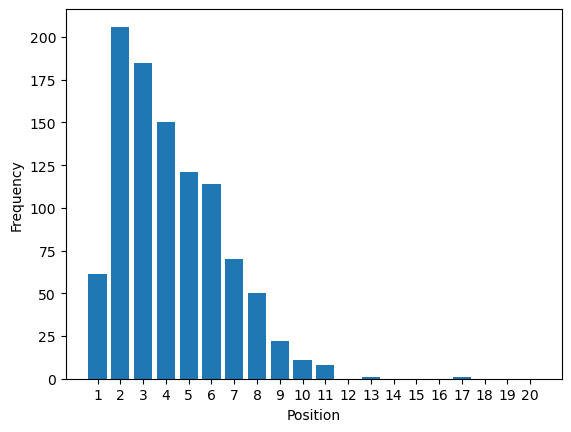

In [17]:
frequency = [end_positions.count(i) for i in range(1, 21)]
plt.bar(range(1, 21), frequency)
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(range(1, 21))

plt.show()